## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)

study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head(11)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

types_drug=combined_data.groupby(["Drug Regimen"])
# types_drug.count().head(30)

#MEAN
mean_tumor= types_drug["Tumor Volume (mm3)"].mean()
#MEDIAN
median_tumor=types_drug["Tumor Volume (mm3)"].median()
#variance
variance_tumor=types_drug["Tumor Volume (mm3)"].var()
#std dev
standarddev_tumor=types_drug["Tumor Volume (mm3)"].std()
#standard error
sem_tumor_volume = types_drug["Tumor Volume (mm3)"].sem()
#summary table
summary_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor,"Median Tumor Volume": median_tumor,"Tumor Volume Variance": variance_tumor,"Tumor Volume Std. Dev":standarddev_tumor,"Tumor Volume Std. Error":sem_tumor_volume
                             })
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

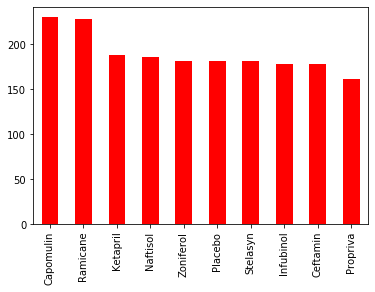

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
chart_count=combined_data["Drug Regimen"].value_counts()

chart_count.plot(kind="bar", facecolor="red")

([<matplotlib.axis.XTick at 0x109c7c710>,
 <a list of 10 Text xticklabel objects>)

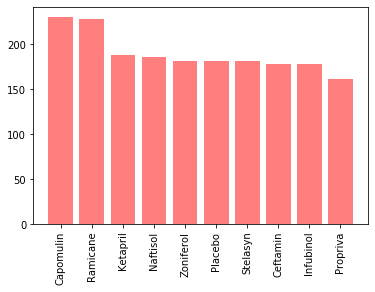

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

y_axis=chart_count
x_axis=np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
labels=["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
plt.xticks(tick_locations,labels,rotation="vertical")



## Pie plots

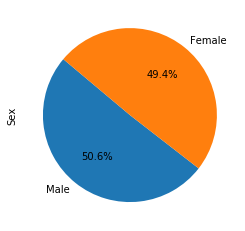

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = combined_data["Sex"].value_counts()

sex_data.plot(kind="pie",autopct="%1.1f%%",startangle=140,shadow=False)

(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

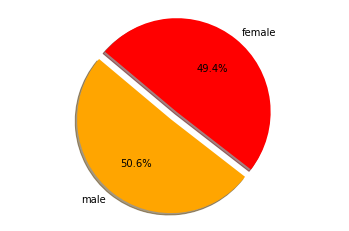

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


colors = ["orange", "red"] 
explode = (0.1, 0)

plt.pie(sex_data, explode=explode, labels=["male","female"],colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
max_ = combined_data.groupby(['Mouse ID']).max()
max_ = max_.reset_index()
max_merged = max_[['Mouse ID', 'Timepoint']].merge(combined_data,
                                                  on = ['Mouse ID', 'Timepoint'], how = 'left')

cap = max_merged.loc[max_merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
inf = max_merged.loc[max_merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

cap_q = inf.quantile([.25,.5,.75])
c_l = cap_q[.25]
c_u = cap_q[.75]
c_i =c_u - c_l
l_b = c_l - (1.5*c_i)
u_b = c_u + (1.5*c_i)

print(f'{cap.loc[(cap< l_b)]})')
print(f'{cap.loc[(cap> u_b)]})')



61     30.485985
122    28.430964
125    33.329098
164    32.377357
175    23.343598
184    34.455298
193    31.023923
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64))


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dc13550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dc0a950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1daf5b50>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1dc1da50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dc1df50>,
 'means': []}

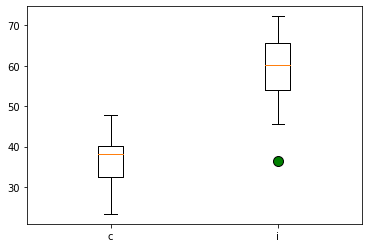

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
m = dict(markerfacecolor = 'green', markersize = 10)
plt.boxplot([cap,inf], labels = ['c', 'i'], flierprops = m)

## Line and scatter plots

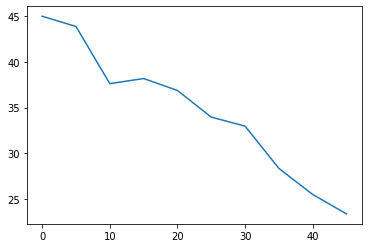

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timevvolume_table = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
mouse = timevvolume_table.loc[timevvolume_table['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

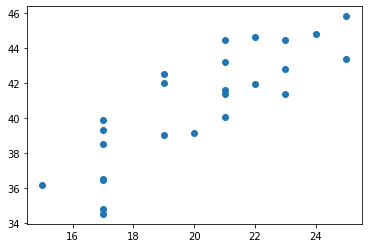

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot = timevvolume_table.groupby(['Mouse ID']).mean()
plt.scatter(scatter_plot['Weight (g)'], scatter_plot['Tumor Volume (mm3)'])

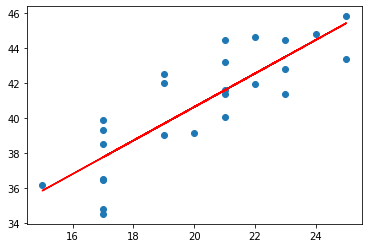

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

stan_measure = st.linregress(scatter_plot['Weight (g)'], scatter_plot['Tumor Volume (mm3)'])
y_value = scatter_plot['Weight (g)']*stan_measure[0]+stan_measure[1]
plt.scatter(scatter_plot['Weight (g)'], scatter_plot['Tumor Volume (mm3)'])
plt.plot(scatter_plot['Weight (g)'], y_value, color = 'red')